In [316]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

# print("Path to dataset files:", path)

## About Dataset ##

### Data Source ###
This dataset is a synthetic version inspired by the original Credit Risk dataset on Kaggle and enriched with additional variables based on Financial Risk for Loan Approval data. SMOTENC was used to simulate new data points to enlarge the instances. The dataset is structured for both categorical and continuous features.

Data Aviable at: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

### Meta Data ###
| Feature                          | Description                                           | Data Type   |
|----------------------------------|-------------------------------------------------------|-------------|
| person_age                       | Age of the person                                     | Float       |
| person_gender                    | Gender of the person                                  | Categorical |
| person_education                 | Highest education level                               | Categorical |
| person_income                    | Annual income                                         | Float       |
| person_emp_exp                   | Years of employment experience                        | Integer     |
| person_home_ownership            | Home ownership status (e.g., rent, own, mortgage)     | Categorical |
| loan_amnt                        | Loan amount requested                                 | Float       |
| loan_intent                      | Purpose of the loan                                   | Categorical |
| loan_int_rate                    | Loan interest rate                                    | Float       |
| loan_percent_income              | Loan amount as a percentage of annual income          | Float       |
| cb_person_cred_hist_length       | Length of credit history in years                     | Float       |
| credit_score                     | Credit score of the person                            | Integer     |
| previous_loan_defaults_on_file   | Indicator of previous loan defaults                   | Categorical |
| loan_status (target variable)    | Loan approval status: 1 = approved; 0 = rejected      | Integer     |

## Implementation ##

In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("loan_data.csv")

# Display the first 5 rows of the dataset
data.head()


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [318]:
# Print basic information about the dataset
data.info()

# Check for missing values
data.isnull().sum()

# Check the distribution of the target variable
data['loan_status'].value_counts()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [319]:
# Calculate the total number of data points
total_data = len(data)

# Calculate the number of approved and rejected loans
approved_loans = data['loan_status'].value_counts()[1]
rejected_loans = data['loan_status'].value_counts()[0]


# Calculate the percentage of rejected loans
percentage_rejected = (rejected_loans / total_data) * 100

print(f'Total data points: {total_data}')
print(f'Number of approved loans: {approved_loans}')
print(f'Number of rejected loans: {rejected_loans}')
print(f'Percentage of rejected loans: {percentage_rejected:.2f}%')

Total data points: 45000
Number of approved loans: 10000
Number of rejected loans: 35000
Percentage of rejected loans: 77.78%


### Data Viualization ###

Lowest person_age: 20.0
Highest person_age: 144.0


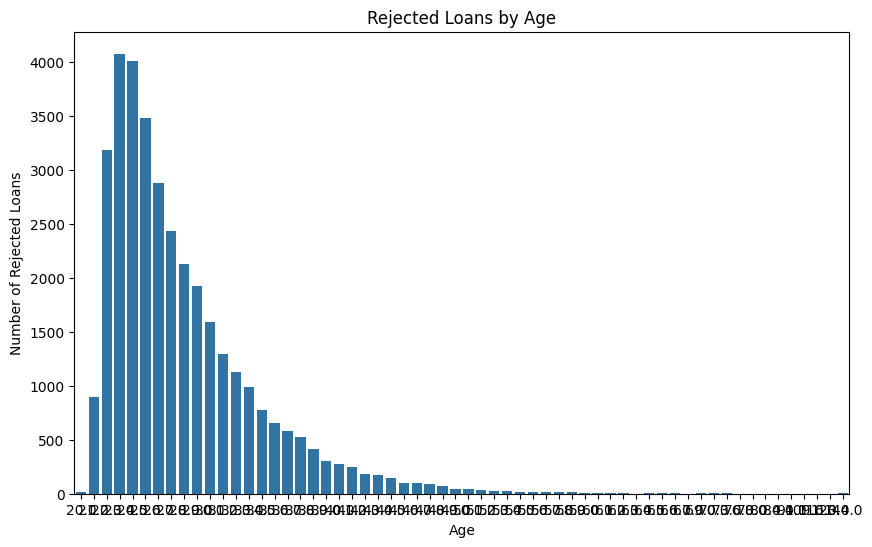

In [320]:
# Print the lowest/highest person_age
print(f'Lowest person_age: {data["person_age"].min()}')
print(f'Highest person_age: {data["person_age"].max()}')

# Bar plot for rejected_loans based on person_age
plt.figure(figsize=(10, 6))
rejected_loans_by_age = data[data['loan_status'] == 0]['person_age'].value_counts().sort_index()
sns.barplot(x=rejected_loans_by_age.index, y=rejected_loans_by_age.values)
plt.title('Rejected Loans by Age')
plt.xlabel('Age')
plt.ylabel('Number of Rejected Loans')
plt.show()


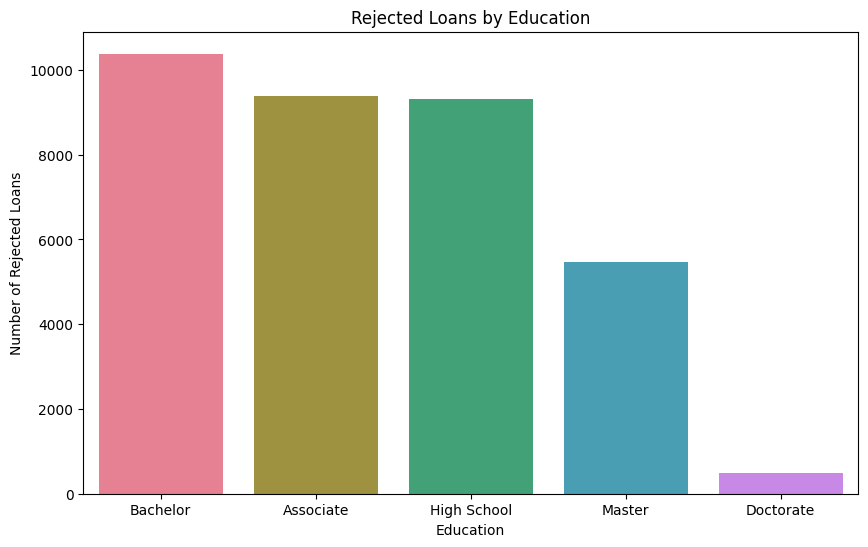

In [321]:
# Bar plot for rejected_loans based on person_education
plt.figure(figsize=(10, 6))
rejected_loans_by_education = data[data['loan_status'] == 0]['person_education'].value_counts().sort_values(ascending=False)
palette = sns.color_palette("husl", len(rejected_loans_by_education))
sns.barplot(x=rejected_loans_by_education.index, y=rejected_loans_by_education.values, hue=rejected_loans_by_education.index, palette=palette, legend=False)
plt.title('Rejected Loans by Education')
plt.xlabel('Education')
plt.ylabel('Number of Rejected Loans')
plt.show()


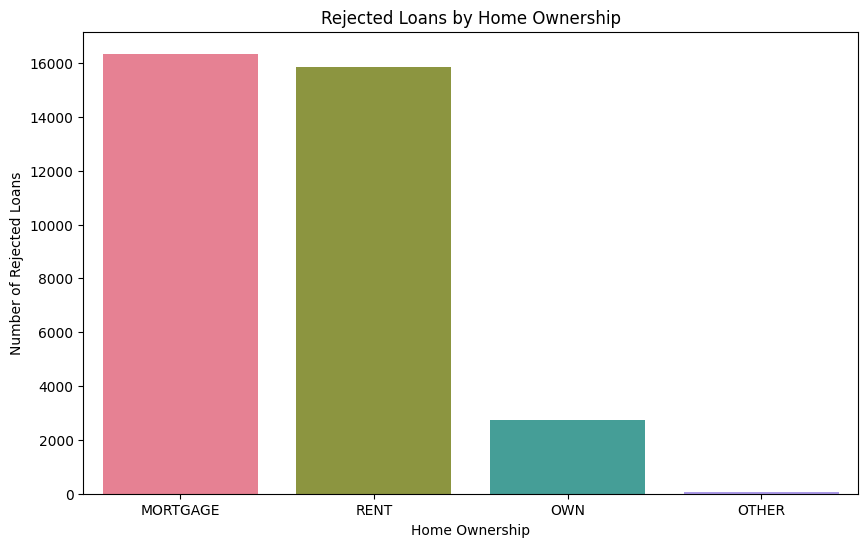

In [322]:
# Bar plot for rejected_loans based on person_home_ownership
plt.figure(figsize=(10, 6))
rejected_loans_by_home_ownership = data[data['loan_status'] == 0]['person_home_ownership'].value_counts().sort_values(ascending=False)
palette = sns.color_palette("husl", len(rejected_loans_by_home_ownership))
sns.barplot(x=rejected_loans_by_home_ownership.index, y=rejected_loans_by_home_ownership.values, hue=rejected_loans_by_home_ownership.index, palette=palette, legend=False)
plt.title('Rejected Loans by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Number of Rejected Loans')
plt.show()

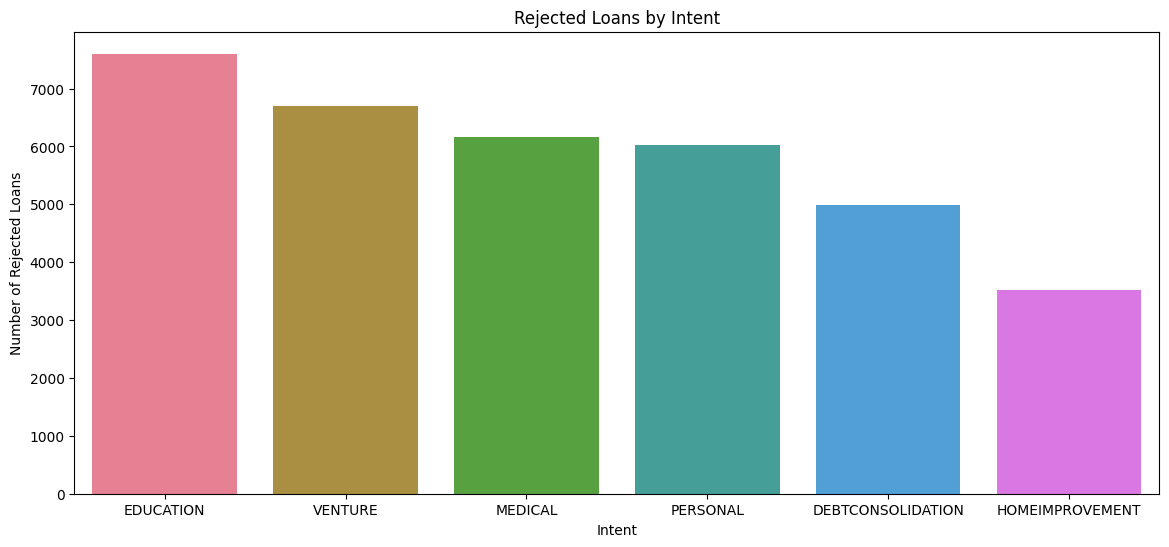

In [323]:
# Bar plot for rejected_loans based on loan_intent
plt.figure(figsize=(14, 6))
rejected_loans_by_intent = data[data['loan_status'] == 0]['loan_intent'].value_counts().sort_values(ascending=False)
palette = sns.color_palette("husl", len(rejected_loans_by_intent))
sns.barplot(x=rejected_loans_by_intent.index, y=rejected_loans_by_intent.values, hue=rejected_loans_by_intent.index, palette=palette, legend=False)
plt.title('Rejected Loans by Intent')
plt.xlabel('Intent')
plt.ylabel('Number of Rejected Loans')
plt.show()

### Data Pre-processing ###

In [324]:
# Cataegorize the person_age
# Age Range	Category
# 20–29	Young Adults
# 30–39	Adults
# 40–59	Middle-Aged
# 60–79	Seniors
# 80+	Elderly

# Define age bins and labels
age_bins = [20, 29, 39, 59, 79, 150]  # 150 to cover the max age (144)
age_labels = ['Young Adults', 'Adults', 'Middle-Aged', 'Seniors', 'Elderly']

# Create a new column for age categories
data['person_age_category'] = pd.cut(data['person_age'], bins=age_bins, labels=age_labels, right=True)

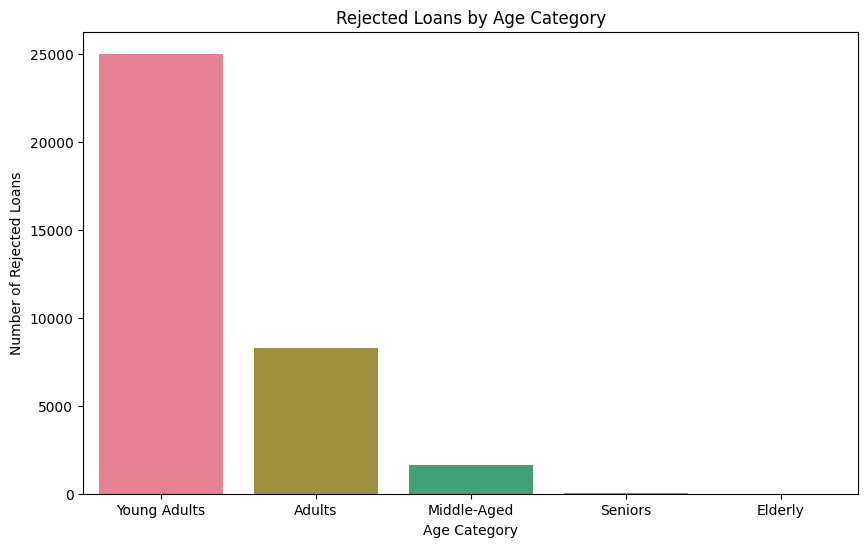

In [325]:
# Bar plot for rejected_loans based on person_age_category
plt.figure(figsize=(10, 6))
rejected_loans_by_age_category = data[data['loan_status'] == 0]['person_age_category'].value_counts().sort_index()
palette = sns.color_palette("husl", len(rejected_loans_by_age_category))
sns.barplot(x=rejected_loans_by_age_category.index, y=rejected_loans_by_age_category.values, hue=rejected_loans_by_age_category.index, palette=palette, legend=False)
plt.title('Rejected Loans by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Rejected Loans')
plt.show()

In [326]:
# Check to Encode Categorical Variables
# 1. person_age_category
person_age_category = data['person_age_category'].value_counts()
print(person_age_category)
print("-" * 50)

# 2. person_gender
person_gender = data['person_gender'].value_counts()
print(person_gender)
print("-" * 50)

# 3. person_education
person_education = data['person_education'].value_counts()
print(person_education)
print("-" * 50)

# 4. person_home_ownership
person_home_ownership = data['person_home_ownership'].value_counts()
print(person_home_ownership)
print("-" * 50)

# 5. loan_intent
loan_intent = data['loan_intent'].value_counts()
print(loan_intent)
print("-" * 50)

# 6. previous_loan_defaults_on_file
previous_loan_defaults_on_file = data['previous_loan_defaults_on_file'].value_counts()
print(previous_loan_defaults_on_file)
print("-" * 50)

person_age_category
Young Adults    32361
Adults          10434
Middle-Aged      2094
Seniors            84
Elderly            10
Name: count, dtype: int64
--------------------------------------------------
person_gender
male      24841
female    20159
Name: count, dtype: int64
--------------------------------------------------
person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64
--------------------------------------------------
person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64
--------------------------------------------------
loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64
--------------------------------------------------
previous_loan_defaults_on_file
Yes    22858
No     2214

```markdown
### Encoded Categorical Variables ###

After encoding the categorical variables, the dataset now contains numerical representations for the following features:

1. **person_age**:
    - 0: Young Adults
    - 1: Adults
    - 2: Middle-Aged
    - 3: Seniors
    - 4: Elderly

2. **person_gender**:
    - 0: Male
    - 1: Female

3. **person_education**:
    - 1: Doctorate
    - 2: Master
    - 3: Bachelor
    - 4: Associate
    - 5: High School

4. **person_home_ownership**:
    - 1: OWN
    - 2: MORTGAGE
    - 3: RENT
    - 4: OTHER

5. **loan_intent**:
    - 1: EDUCATION
    - 2: HOMEIMPROVEMENT
    - 3: MEDICAL
    - 4: DEBTCONSOLIDATION
    - 5: PERSONAL
    - 6: VENTURE

6. **previous_loan_defaults_on_file**:
    - Yes
    - No
```

In [327]:
# Encode Categorical Variables
# Define ranking dictionary (Based on Age)
age_rank = {
    'Young Adults': 1,
    'Adults': 2,
    'Middle-Aged': 3,
    'Seniors': 4,
    'Elderly': 5
}
data['person_age_category'] = data['person_age_category'].map(age_rank)

data['person_gender'] = data['person_gender'].map({'male': 0, 'female': 1})

# Define ranking dictionary (Based on Frequency)
education_rank = {
    'Doctorate': 1,
    'Master': 2,
    'Bachelor': 3,
    'Associate': 4,
    'High School': 5
}
data['person_education'] = data['person_education'].map(education_rank)

# Define ranking dictionary (Based on Stability and Ownership)
home_ownership_rank = {
    'OWN': 1,
    'MORTGAGE': 2,
    'RENT': 3,
    'OTHER': 4
}
data['person_home_ownership'] = data['person_home_ownership'].map(home_ownership_rank)

# Define ranking dictionary (Based on Risk Perception)
loan_intent_rank = {
    'EDUCATION': 1,
    'HOMEIMPROVEMENT': 2,
    'MEDICAL': 3,
    'DEBTCONSOLIDATION': 4,
    'PERSONAL': 5,
    'VENTURE': 6
}
data['loan_intent'] = data['loan_intent'].map(loan_intent_rank)

data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

In [328]:
# Check to Encode Categorical Variables
# 1. person_age_category
person_age_category = data['person_age_category'].value_counts()
print(person_age_category)
print("-" * 50)

# 2. person_gender
person_gender = data['person_gender'].value_counts()
print(person_gender)
print("-" * 50)

# 3. person_education
person_education = data['person_education'].value_counts()
print(person_education)
print("-" * 50)

# 4. person_home_ownership
person_home_ownership = data['person_home_ownership'].value_counts()
print(person_home_ownership)
print("-" * 50)

# 5. loan_intent
loan_intent = data['loan_intent'].value_counts()
print(loan_intent)
print("-" * 50)

# 6. previous_loan_defaults_on_file
previous_loan_defaults_on_file = data['previous_loan_defaults_on_file'].value_counts()
print(previous_loan_defaults_on_file)
print("-" * 50)

person_age_category
1    32361
2    10434
3     2094
4       84
5       10
Name: count, dtype: int64
--------------------------------------------------
person_gender
0    24841
1    20159
Name: count, dtype: int64
--------------------------------------------------
person_education
3    13399
4    12028
5    11972
2     6980
1      621
Name: count, dtype: int64
--------------------------------------------------
person_home_ownership
3    23443
2    18489
1     2951
4      117
Name: count, dtype: int64
--------------------------------------------------
loan_intent
1    9153
3    8548
6    7819
5    7552
4    7145
2    4783
Name: count, dtype: int64
--------------------------------------------------
previous_loan_defaults_on_file
1    22858
0    22142
Name: count, dtype: int64
--------------------------------------------------


In [329]:
# remove person_age column
data = data.drop(columns=['person_age'])
data.head()

,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_age_category
0,1,2,71948.0,0,3,35000.0,5,16.02,0.49,3.0,561,0,1,1
1,1,5,12282.0,0,1,1000.0,1,11.14,0.08,2.0,504,1,0,1
2,1,5,12438.0,3,2,5500.0,3,12.87,0.44,3.0,635,0,1,1
3,1,3,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1,1
4,0,2,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1,1


### Model Classification ###

In [330]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Total data points:', len(data))
print('Training set:', len(X_train))
print('Testing Set:', len(X_test))


Total data points: 45000
Training set: 36000
Testing Set: 9000


In [331]:
# Train a Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



Confusion Matrix:
 [[6798  192]
 [ 456 1554]]


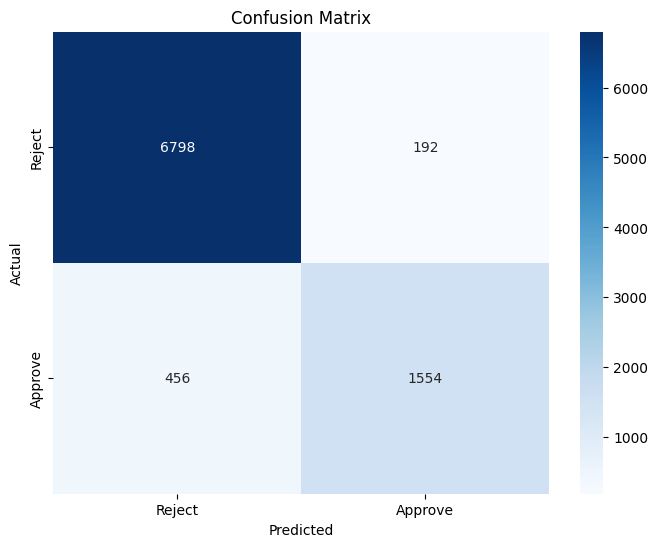

In [332]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Reject', 'Approve'], yticklabels=['Reject', 'Approve'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

                           Feature  Importance
11  previous_loan_defaults_on_file    0.221051
8              loan_percent_income    0.168610
7                    loan_int_rate    0.163279
2                    person_income    0.133419
4            person_home_ownership    0.064502
5                        loan_amnt    0.062221
10                    credit_score    0.058616
6                      loan_intent    0.038511
3                   person_emp_exp    0.029652
9       cb_person_cred_hist_length    0.028024
1                 person_education    0.017834
0                    person_gender    0.008249
12             person_age_category    0.006031


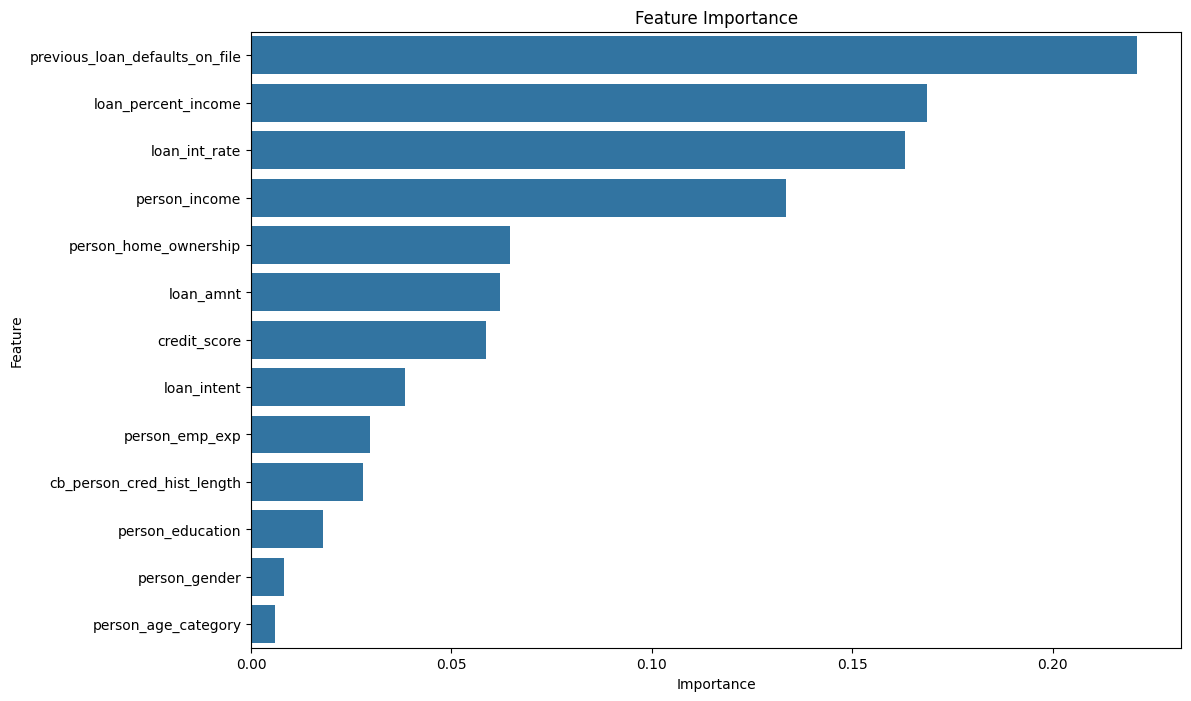

In [333]:
# Feature Importance
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()